# Kaggle Titanic Competition

Load packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

Read data

In [2]:
df_train  = pd.read_csv('../raw_data/train.csv')
df_test   = pd.read_csv('../raw_data/test.csv')
df_submit = pd.read_csv('../raw_data/gender_submission.csv')

# select those who survived
df_survived = df_train[df_train['Survived'] == 1]

## Kaggle Titanic Tutorial
https://www.kaggle.com/alexisbcook/titanic-tutorial

In [30]:
# percentage of women who survived
women = df_train.loc[df_train.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

print('percentage of women who survived:', round(rate_women*100, 2), '%')

percentage of women who survived: 74.2 %


In [31]:
# percentage of men who survived
men = df_train.loc[df_train.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print('percentage of men who survived:', round(rate_men*100, 2), '%')

percentage of men who survived: 18.89 %


In [5]:
# random forest model
y = df_train['Survived']

features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(df_train[features])
X_test = pd.get_dummies(df_test[features])

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X, y)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId' : df_test.PassengerId, 'Survived': predictions})
output.to_csv('../clean_data/submission.csv', index =False)
print('Your submission was successfully saved!')

Your submission was successfully saved!


End tutorial

## Data Analysis

### General

In [4]:
# number of rows and columns
df_train.shape

(891, 12)

In [5]:
# column information
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 5 first entries
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# summary statistics
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Missing values heatmap')

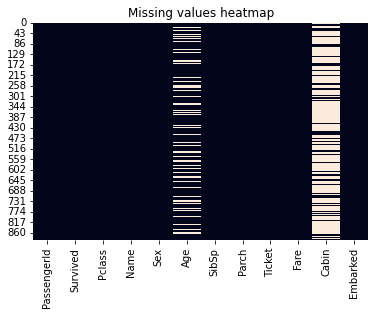

In [21]:
# missing values
sns.heatmap(df_train.isnull(), cbar = False).set_title("Missing values heatmap")

In [21]:
df_train.groupby('Survived').mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


### Features

1. Survived

In [26]:
# percentage of surivors
perc_survivors = round((df_train['Survived'].sum()/df_train['PassengerId'].count()*100), 2)
print(perc_survivors, '% of registered passengers survived')

38.38 % of registered passengers survived


2. Embarked

In [27]:
# percentage embarked
perc_embarked = pd.DataFrame(np.array([['Cherbourg', round((df_train[df_train['Embarked'] == 'C'].shape[0]/df_train.shape[0]), 2)], 
                                       ['Queenstown', round((df_train[df_train['Embarked'] == 'Q'].shape[0]/df_train.shape[0]), 2)], 
                                       ['Southampton', round((df_train[df_train['Embarked'] == 'S'].shape[0]/df_train.shape[0]), 2)]]),
                             columns = ['Feature', 'Percentage'])

perc_embarked

,Feature,Percentage
0,Cherbourg,0.19
1,Queenstown,0.09
2,Southampton,0.72


3. Age

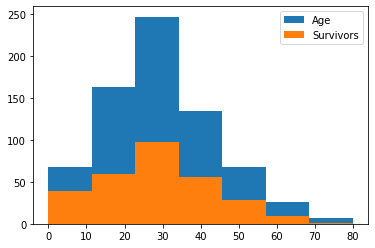

In [57]:
# number of bins
age_bins = np.linspace(0,80,8)

# age distribution and number of survivors per age group
age       = df_train['Age']
survivors = df_survived['Age']

# histogram with age distribution and survivors
plt.hist(age, age_bins, label = 'Age')
plt.hist(survivors, age_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

4. Pclass

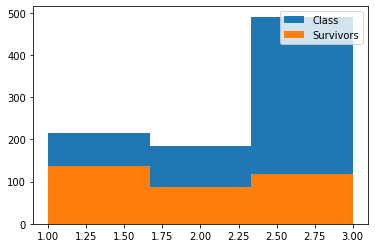

In [58]:
# number of bins
class_bins = 3

# class distribution and number of survivors per class
pclass    = df_train['Pclass']
survivors = df_survived['Pclass']

# histogram with class distribution and survivors
plt.hist(pclass, bins = class_bins, label = 'Class')
plt.hist(survivors, bins = class_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

4a. Pclass (seaborn)

<AxesSubplot:xlabel='Survived', ylabel='count'>

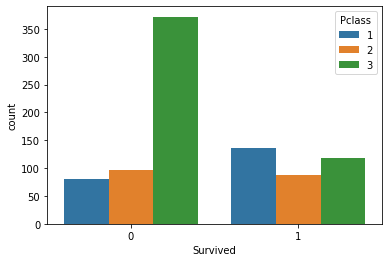

In [8]:
sns.countplot(x='Survived',hue='Pclass',data=df_train)

4b. Pclass (chanc of survival as male)

<AxesSubplot:xlabel='Survived', ylabel='count'>

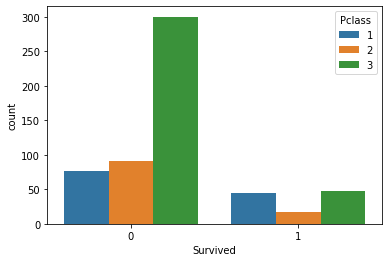

In [17]:
df_train_male = df_train[df_train['Sex']=='male']
sns.countplot(x='Survived', hue='Pclass', data=df_train_male)

5. Sex

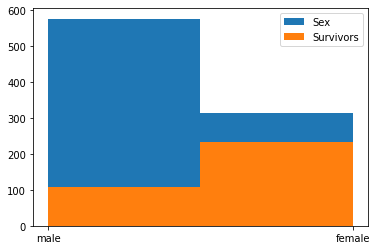

In [6]:
# number of bins
sex_bins = 2

# sex distribution and number of survivors per sex
sex       = df_train['Sex']
survivors = df_survived['Sex']

# histogram with sex distribution and survivors
plt.hist(sex, bins = sex_bins, label = 'Sex')
plt.hist(survivors, bins = sex_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

5a. Sex (seaborn)

<AxesSubplot:xlabel='Survived', ylabel='count'>

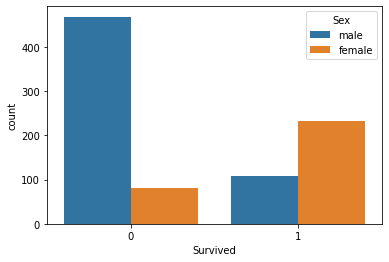

In [6]:
sns.countplot(x='Survived',hue='Sex',data=df_train)

6. Fare

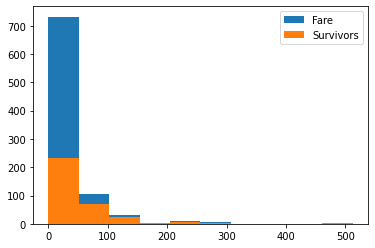

In [7]:
# number of bins
fare_bins = 10

# fare distribution and number of survivors per fare
fare      = df_train['Fare']
survivors = df_survived['Fare']

# histogram with fare distribution and survivors
plt.hist(fare, bins = fare_bins, label = 'Fare')
plt.hist(survivors, bins = fare_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

7. SibSp

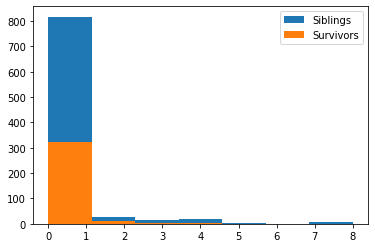

In [17]:
# number of bins
sibsp_bins = np.linspace(0, 8, 8)

# sibsp distribution and number of survivors per fare
sibsp     = df_train['SibSp']
survivors = df_survived['SibSp']

# histogram with sibsp distribution and survivors
plt.hist(sibsp, bins = sibsp_bins, label = 'Siblings')
plt.hist(survivors, bins = sibsp_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

8. Parch

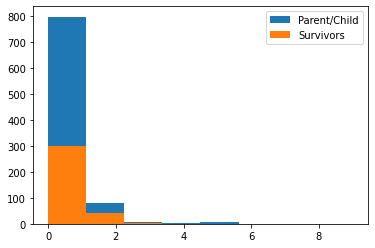

In [19]:
# number of bins
parch_bins = np.linspace(0, 9, 9)

# sibsp distribution and number of survivors per fare
parch     = df_train['Parch']
survivors = df_survived['Parch']

# histogram with sibsp distribution and survivors
plt.hist(parch, bins = parch_bins, label = 'Parent/Child')
plt.hist(survivors, bins = parch_bins, label = 'Survivors')
plt.legend(loc = 'upper right')
plt.show()

### Correlation

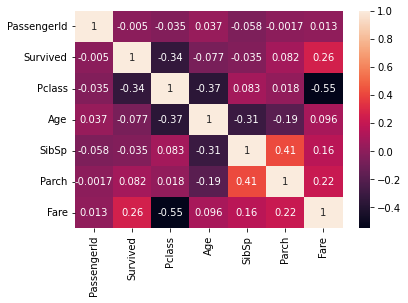

In [11]:
corr_matrix = df_train.corr(method = 'pearson')
sns.heatmap(corr_matrix, annot = True)
plt.show()

### Logistic Regression - Fare

In [3]:
# prepare data
x_train, x_valid, y_train, y_valid = train_test_split(np.array(df_train['Fare']).reshape((-1, 1)), np.array(df_train['Survived']), test_size = 0.2, random_state=7)

# define model
model = LogisticRegression().fit(x_train, y_train)

In [4]:
# return R-squared
r_sq = model.score(x_train, y_train)
print('coefficient of determination:', r_sq)

# intercept
print('intercept:', model.intercept_)

# slope
print('slope:', model.coef_)

coefficient of determination: 0.6629213483146067
intercept: [-0.87494818]
slope: [[0.01252897]]


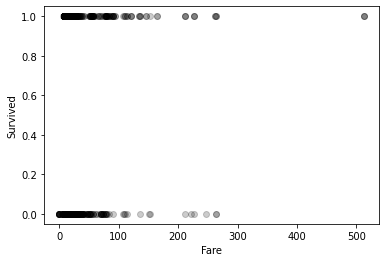

In [22]:
# Plot outputs
plt.scatter(x_train, y_train, color="black", alpha = 0.2)
# plt.plot(x_train, y_train, color="blue", linewidth=3)

plt.ylabel('Survived')
plt.xlabel('Fare')

plt.show()

In [8]:
# statistical significance
model.conf_int()

AttributeError: 'LinearRegression' object has no attribute 'conf_int'

In [5]:
y_pred = model.predict(x_valid)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(model.score(x_valid, y_valid)))

Accuracy of logistic regression classifier on test set: 0.69


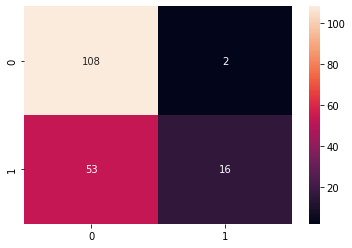

In [6]:
# confusion matrix
logreg_fare_cm = metrics.confusion_matrix(y_valid, y_pred)
sns.heatmap(logreg_fare_cm, annot = True, fmt = 'd')
plt.show()

In [31]:
print(metrics.classification_report(y_valid, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.98      0.80       110
           1       0.89      0.23      0.37        69

    accuracy                           0.69       179
   macro avg       0.78      0.61      0.58       179
weighted avg       0.75      0.69      0.63       179



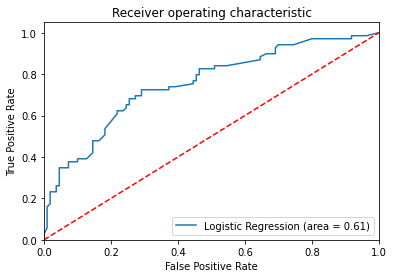

In [18]:
logit_roc_auc = metrics.roc_auc_score(y_valid, model.predict(x_valid))
fpr, tpr, thresholds = metrics.roc_curve(y_valid, model.predict_proba(x_valid)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
# plt.savefig('Log_ROC')
plt.show()

### Logistic Regression - All

In [33]:
df_train.loc[:,('Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked')]

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...
886,2,male,27.0,0,0,13.0000,S
887,1,female,19.0,0,0,30.0000,S
888,3,female,NaN,1,2,23.4500,S
889,1,male,26.0,0,0,30.0000,C


In [24]:
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [37]:
df_train[df_train['Age'].isna()].head(50)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
29,30,0,3,"Todoroff, Mr. Lalio",male,NaN,0,0,349216,7.8958,NaN,S
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C
32,33,1,3,"Glynn, Miss. Mary Agatha",female,NaN,0,0,335677,7.7500,NaN,Q
36,37,1,3,"Mamee, Mr. Hanna",male,NaN,0,0,2677,7.2292,NaN,C
42,43,0,3,"Kraeff, Mr. Theodor",male,NaN,0,0,349253,7.8958,NaN,C
